In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt


from metastable.map.map import FixedPointMap


map_path = "/home/paul/Projects/keldysh/metastable/experiments/output2/output_map.npz"
fixed_point_map = FixedPointMap.load(map_path)

Quimb not available.


In [4]:
def calculate_action(bvp_result):
    
    def integrand_func(t):
        integrand = -bvp_result.sol(t,nu=1)[0]*bvp_result.sol(t)[2]
        integrand -= bvp_result.sol(t,nu=1)[1]*bvp_result.sol(t)[3]
        return integrand

    action, action_error = scipy.integrate.quad(integrand_func, 0, bvp_result.x[-1], limit=2000, epsabs=1e-2)
    
    return action, action_error

In [14]:
indexes = np.where(fixed_point_map.path_results[380,:,0])[0]

actions_array = np.zeros(len(indexes))
actions_list = []

for idx in indexes:
    bvp_result = fixed_point_map.path_results[380,idx,0]
    action, action_error = calculate_action(bvp_result)
    actions_list.append(action)

In [18]:
from metastable.rescaled.barriers import dykman_actions_calc


epsilon = fixed_point_map.epsilon_linspace[380]


dykman_actions = dykman_actions_calc(
    delta=fixed_point_map.delta,
    chi=fixed_point_map.chi,
    eps=fixed_point_map.epsilon_linspace[380],
    kappa=fixed_point_map.kappa_linspace[indexes],
) 

In [21]:
dykman_actions[1]

array([-3.76186638, -3.82624245, -3.89134596, -3.95718275, -4.02375874,
       -4.09107996, -4.15915253, -4.22798265, -4.29757664, -4.3679409 ,
       -4.43908198, -4.51100648, -4.58372116, -4.65723288, -4.73154862,
       -4.80667547, -4.88262067, -4.95939158, -5.03699569, -5.11544064,
       -5.19473422, -5.27488434, -5.35589909, -5.4377867 , -5.52055559,
       -5.60421431, -5.68877162, -5.77423644, -5.86061787, -5.94792521,
       -6.03616797, -6.12535584, -6.21549874, -6.30660679, -6.39869036,
       -6.49176002, -6.58582662, -6.68090123, -6.77699518, -6.87412009,
       -6.97228783, -7.07151057, -7.17180078, -7.27317121, -7.37563497,
       -7.47920547, -7.58389646, -7.68972207])

(-100.0, 10.0)

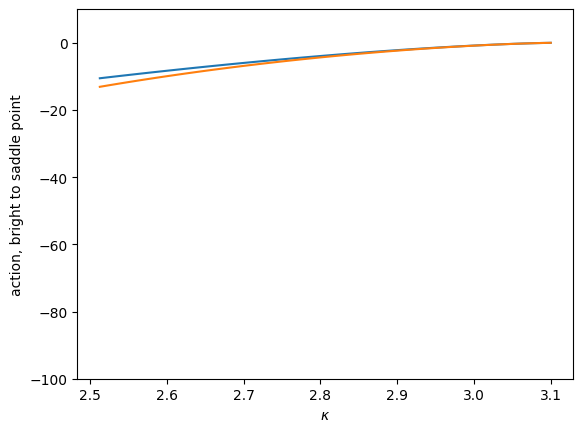

In [23]:
plt.plot(fixed_point_map.kappa_linspace[indexes], actions_list)
plt.plot(fixed_point_map.kappa_linspace[indexes], dykman_actions[0])
plt.xlabel(r'$\kappa$')
plt.ylabel(r'action, bright to saddle point')
plt.ylim([-100,10])

In [16]:
import pandas as pd
actions_series = pd.Series(actions_list, index=fixed_point_map.kappa_linspace[indexes])
actions_series.to_frame().to_parquet('actions_bright_to_saddle.parquet')

In [24]:
dykman_actions_series = pd.Series(dykman_actions[0], index=fixed_point_map.kappa_linspace[indexes])
dykman_actions_series.to_frame().to_parquet('dykman_actions_bright_to_saddle.parquet')

In [9]:
dykman_actions_linspace = []
from metastable.dykman import dykman_actions_calc

for kappa in fixed_point_map.kappa_linspace:
    dykman_actions_linspace.append(dykman_actions_calc(
    delta=fixed_point_map.delta,
    chi=fixed_point_map.chi,
    eps=fixed_point_map.epsilon_linspace[360],
    kappa=kappa,
    ))
    
dykman_actions_linspace = np.array(dykman_actions_linspace)

(-100.0, 10.0)

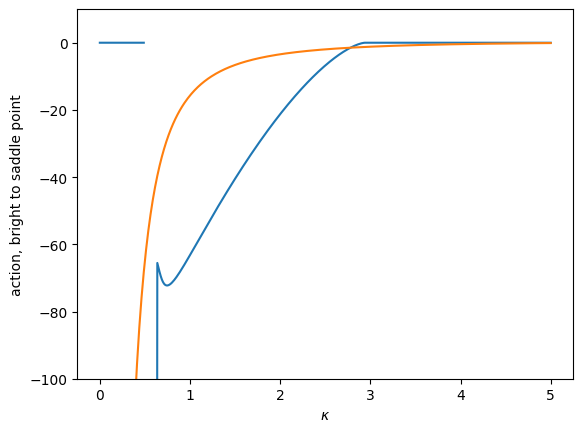

In [10]:
plt.plot(fixed_point_map.kappa_linspace, actions_array)
plt.plot(fixed_point_map.kappa_linspace, dykman_actions_linspace[:,0])
plt.xlabel(r'$\kappa$')
plt.ylabel(r'action, bright to saddle point')
plt.ylim([-100,10])